In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv("bike_sharing_data.csv")

## Data Analysis

In [3]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

** column names should be rename

In [4]:
data.shape

(731, 16)

** has 731 rows and 16 columns

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- instant → Unique record ID for each day
- dteday → Date of the record (YYYY-MM-DD)
- season → Season of the year  1, 2, 3, 4
- yr → Year
- mnth → Month (1 to 12)
- weekday → Day of the week 0 to 6
- holiday → Whether the day is a holiday (0, 1) - yes/no
- workingday → Whether the day is a working day
- weathersit → Weather situation
- temp → Normalized temperature (0–1 scale)
- atemp → Feels-like temperature (normalized)
- hum → Humidity (normalized)
- windspeed → Wind speed (normalized)
- casual → Number of casual (non-registered) users
- registered → Number of registered users
- cnt → Total bike rentals (casual + registered)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


All columns are numeric in representation, but some of them are categorical variables encoded as numbers.

In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- instant → range (1, 731), avg = 366
- season → range (1, 4), avg = 2.49
- yr → range (0, 1), avg = 0.50
- mnth → range (1, 12), avg = 6.52
- holiday → range (0, 1), avg = 0.03
- weekday → range (0, 6), avg = 3.00
- workingday → range (0, 1), avg = 0.68
- weathersit → range (1, 3), avg = 1.39
- temp → range (0.06, 0.86), avg = 0.50
- atemp → range (0.08, 0.84), avg = 0.47
- hum → range (0.00, 0.97), avg = 0.63
- windspeed → range (0.02, 0.51), avg = 0.19
- casual → range (2, 3410), avg = 848
- registered → range (20, 6946), avg = 3656
- cnt → range (22, 8714), avg = 4504

## Data Visualization

### 1. Histogram - cnt

In [8]:
fig = px.histogram(data, 
                   x='cnt', 
                   nbins=30, 
                   title="Distribution of Total Bike Rentals")
fig.show()

Bike rentals are right-skewed, with most days having moderate demand and few days with very high rentals.

### 2. scatter - temp vs cnt

In [10]:
fig = px.scatter(data, x='temp', y='cnt',
                 title="Temperature vs Bike Rentals")
fig.show()

Bike rentals increase with temperature, showing a positive relationship.

### 3. boxplot - weathersit vs cnt

In [11]:
fig = px.box(data, x='weathersit', y='cnt',
             title="Bike Rentals by Weather Situation")
fig.show()


Clear weather days have higher rentals, while bad weather reduces usage.

### 4. boxplot - workingdays vs cnt

In [12]:
fig = px.box(data, x='workingday', y='cnt',
             title="Working Day vs Bike Rentals")
fig.show()


Working days show more consistent and slightly higher rentals.

### 5. Heatmap - correlation

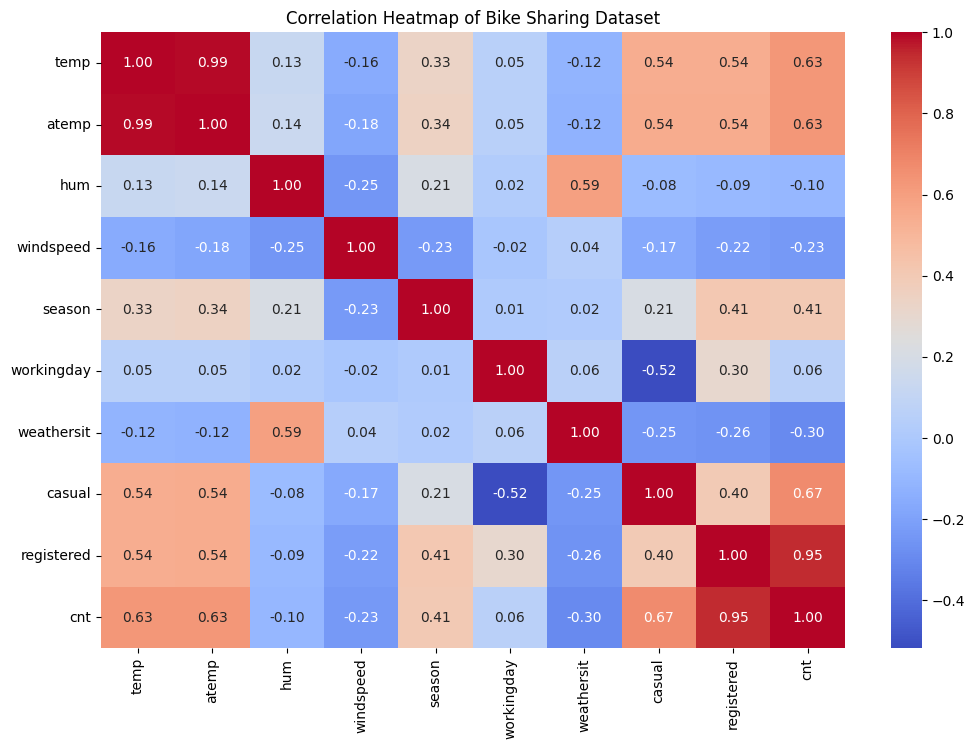

In [18]:
important_cols = [
    'temp', 'atemp', 'hum', 'windspeed',
    'season', 'workingday', 'weathersit',
    'casual', 'registered', 'cnt'
]
corr = data[important_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Bike Sharing Dataset")
plt.show()

total bike rentals (cnt) have strong positive correlation with registered, temp, and atemp, while humidity shows a negative correlation.

## Data Preprocessing

In [20]:
data.duplicated().sum()

np.int64(0)

In [21]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
data = data.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity'
})


In [24]:
data = data.drop(columns=['instant', 'dteday'])

In [25]:
data.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

## Decision Tree Regression

In [26]:
x = data.drop('cnt', axis=1)
y = data['cnt']

In [27]:
print(x.shape) 
print(y.shape)

(731, 13)
(731,)


In [28]:
x.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518


In [29]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [31]:
print(x_train.shape)     # 80%  
print(x_test.shape)  

(584, 13)
(147, 13)


In [32]:
print(y_train.shape)     # 80%  
print(y_test.shape)  

(584,)
(147,)


** Data is ready for regression

In [35]:

dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10
)


In [36]:
dt_model.fit(x_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_lea

In [37]:
y_pred = dt_model.predict(x_test)

In [38]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.9898236175668522
Mean Squared Error: 40806.09568053134


- R² score – 0.989 → Model has very strong predictive performance, explaining almost all variance in bike rentals.

- MSE – 40,806 → Error value is low, indicating predictions are very close to actual rental counts.

In [41]:
compare_df = pd.DataFrame({
    'Actual rentals': y_test,
    'Predicted rentals': y_pred
})

compare_df.head()

,Actual rentals,Predicted rentals
703,6606,6887.142857
33,1550,1543.000000
300,3747,3641.000000
456,6041,5805.000000
633,7538,7591.000000


In [42]:
fig = px.scatter(compare_df, x='Actual rentals', y='Predicted rentals',
                 title="Actual vs Predicted bike rentals",
                 width=600, height=450)
fig.show()


Points lie close to the diagonal, indicating that the predicted bike rentals closely match the actual rentals.